<a href="https://colab.research.google.com/github/Berenice2018/dog-breed133-classifier/blob/master/uda_p2_dog_breed133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip uninstall -y Pillow
#!pip install Pillow==5.3.0

In [0]:
#!pip install Augmentor
'''p = Augmentor.Pipeline()
p.resize(probability=1.0, width=500, height=500, resample_filter='BICUBIC')
p.rotate(probability=0.75, max_left_rotation=25, max_right_rotation=25)
p.flip_left_right(probability=0.5)
p.random_distortion(probability=0.5, grid_width=8, grid_height=8, magnitude=4)
p.random_brightness(probability=0.75, min_factor=0.8, max_factor=1.2)
p.random_contrast(probability=0.75, min_factor=0.8, max_factor=1.2)
p.zoom(probability=0.75, min_factor=1.0, max_factor=1.1)'''

"p = Augmentor.Pipeline()\np.resize(probability=1.0, width=500, height=500, resample_filter='BICUBIC')\np.rotate(probability=0.75, max_left_rotation=25, max_right_rotation=25)\np.flip_left_right(probability=0.5)\np.random_distortion(probability=0.5, grid_width=8, grid_height=8, magnitude=4)\np.random_brightness(probability=0.75, min_factor=0.8, max_factor=1.2)\np.random_contrast(probability=0.75, min_factor=0.8, max_factor=1.2)\np.zoom(probability=0.75, min_factor=1.0, max_factor=1.1)"

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets
import torch.utils.data
#import Augmentor

# save the model on Google Drive, link Google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

# After executing this cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/gdrive/My Drive/ColabUdacity/dog-breed-classifier/"


# check if CUDA is available
use_cuda = torch.cuda.is_available()
print('cuda is available: ', use_cuda)

data_dir = "/content/gdrive/My Drive/ColabUdacity/dog-breed-classifier/"

#dog_files = np.array(glob(data_dir + "dogImages/*/*/*"))
#print('There are %d total dog images.' % len(dog_files))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
dog_app.ipynb  haarcascades  lfw			Untitled0.ipynb
dogImages      images	     uda-p2-dog-breed133.ipynb
cuda is available:  True
There are 8351 total dog images.


**Dog breed data loader**

In [0]:

train_dir = os.path.join(data_dir, 'dogImages/train')
valid_dir = os.path.join(data_dir, 'dogImages/valid')
test_dir = os.path.join(data_dir, 'dogImages/test')

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 64
num_workers = 0
img_size = 224

mean = [0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
    
my_transform = transforms.Compose([#p.torch_transform(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(16),
    transforms.RandomResizedCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
      ])

valid_transform = transforms.Compose([
    transforms.Resize(320),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
train_data = datasets.ImageFolder(train_dir, transform=my_transform)
valid_data = datasets.ImageFolder(valid_dir, transform = valid_transform)
test_data = datasets.ImageFolder(test_dir, transform = valid_transform)

print('length of train_data = {} |valid_data= {} | test_data= {}'.format(len(train_data), len(valid_data), len(test_data)))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

loaders_scratch = [train_loader, valid_loader, test_loader]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ', device)

length of train_data = 6680 |valid_data= 835 | test_data= 836
device:  cuda


**Visualize some data**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

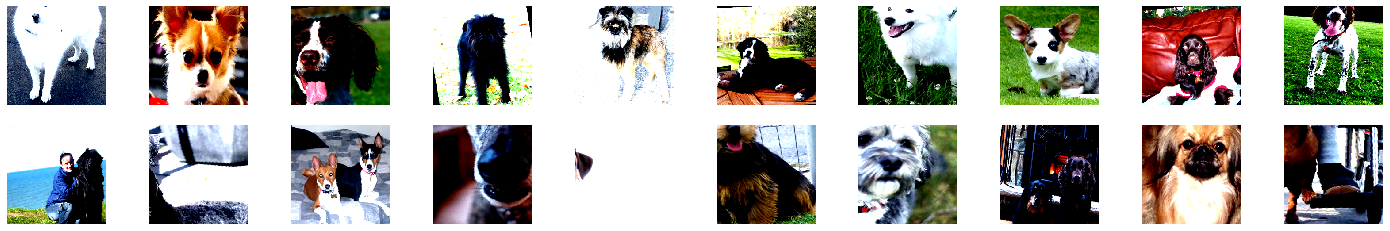

In [0]:
# function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# get a batch of training images
dataiter = iter(train_loader)
images, _ = dataiter.next()
images = images.numpy() # convert images to numpy

# plot the images of the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])


**Model Architecture**

In [0]:
import torch.nn as nn
import torch.nn.functional as F


def weights_init_normal(m):
    '''Takes in a module and initializes all linear layers with weight
       values taken from a normal distribution.'''
    classname = m.__class__.__name__
    # for every Linear layer in a model
    if classname.find('Linear') != -1:
        n = m.in_features
        # m.weight.data shoud be taken from a normal distribution
        m.weight.data.normal_(0, 1/np.sqrt(n))
        # m.bias.data should be 0
        m.bias.data.fill_(0)
        
        
# normalize each layer:
class MyBatchNormLayer(nn.Module):
    def __init__(self, input_number, filter_number, stride=2, kernel_size=3, padding=1):
        super().__init__()
        self.conv = nn.Conv2d(input_number, filter_number, kernel_size=kernel_size,
                             stride=stride, bias=False, padding=1)
        self.normalized = nn.BatchNorm2d(filter_number)
    
    def forward(self,x):
        x = F.relu(self.conv(x))
        #print('MyBatchNormLayer x.shape= ', x.shape)
        return self.normalized(x)

    
class ResnetLayer(MyBatchNormLayer):
    def forward(self, x): return x + super().forward(x)
    
    
class MyConvBnNet(nn.Module):
    def __init__(self, layers, classes_number, dropout=0):
        super().__init__()
        # define the first convolutional layer manually
        self.conv1 = MyBatchNormLayer(3, 64,kernel_size=7, stride=2, padding=1)
        self.pool1 = nn.MaxPool2d(3,2)
        
        self.layers1 = nn.ModuleList([MyBatchNormLayer(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers4 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers5 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers6 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers7 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        self.layers8 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i+1], 1) for i in range(len(layers) - 1)])
        
        #self.linear1 = nn.Linear(layers[-1], 512)
        self.outlayer = nn.Linear(layers[-1], classes_number)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        for lyr1 ,lyr2, lyr3, lyr4, lyr5, lyr6 in zip(
            self.layers1, self.layers2, self.layers3, self.layers4, self.layers5, self.layers6): 
            x = lyr4(lyr3(lyr2(lyr1(x))))
            x =  lyr6(lyr5(x)) # lyr8(lyr7(lyr6(lyr5(x))))
        x = F.adaptive_max_pool2d(x,1)
        #print('MyConvBnNet after adaptive_max_pool2d, x.shape=', x.shape)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        #x = self.linear1(x)
        x = self.outlayer(x)
        return F.log_softmax(x, dim= -1)


# check if CUDA is available
use_cuda = torch.cuda.is_available()
print('cuda available: ', use_cuda)

# instantiate the CNN
#model_scratch = MyConvBnNet([10, 20, 40], 133)
model_scratch = MyConvBnNet([64, 128, 256, 512, 1024], 133, 0.1)
print(model_scratch)

model_scratch.apply(weights_init_normal)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
print('model is on cuda: ', next(model_scratch.parameters()).is_cuda)

cuda available:  True
MyConvBnNet(
  (conv1): MyBatchNormLayer(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1), bias=False)
    (normalized): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layers1): ModuleList(
    (0): MyBatchNormLayer(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalized): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): MyBatchNormLayer(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalized): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): MyBatchNormLayer(
      (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalized): BatchNorm2d(512, eps=1e-05, momentum=0

**Loss, Optimizer, scheduler**

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
#optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=1e-4)
######### change the position of optim.step() in the train section
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_scratch, patience = 3, factor=0.1)

scheduler = optim.lr_scheduler.MultiStepLR(optimizer_scratch, [10, 18, 26, 32], 0.2)

**Visualize, plot**

In [0]:
# Visualize plot
def plot_loss_acc(n_epochs, train_losses, valid_losses, valid_accuracies):
    fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
    ax1.plot(valid_losses, label='Validation loss')
    ax1.plot(train_losses, label='Training loss')
    ax1.legend(frameon=False)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    #x_ticks = [x for x in range(0,n_epochs,2)]
    #plt.xticks(x_ticks)
    
    ax2.plot(valid_accuracies, label = 'Validation accuracy')
    ax2.legend(frameon=False)
    ax2.set_xlabel('Epochs')
    
    plt.tight_layout()

**Train, validate**

In [0]:
# helper functions
import datetime

def get_time():
      hour = datetime.datetime.today().hour +2
      minute = datetime.datetime.today().minute
      second = datetime.datetime.today().second
      return hour, minute, second

def train_epoch(model, dataloader, criterion, optimizer, train_on_gpu):
    # initialize variables to monitor training and validation loss
    train_loss = 0.0
    train_accuracy = 0.0
    correct = 0.0
    total = 0.0
    
    for batch_idx, (data, target) in enumerate(dataloader):
        # move to GPU
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        
        ## find the loss and update the model parameters accordingly
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # get the loss per batch and accumulate
        train_loss += loss.item()
        
        # get the class, highest probability
        probabilities = torch.exp(output)
        _, top_class = probabilities.topk(1, dim=1)
        # The following line is equivalent to the previous (?)
        #_, top_class = torch.max(probabilities, dim=1)
        
        # check if the predicted class is correct
        equals = top_class == target.view(*top_class.shape)
        # 
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

    return train_loss, train_accuracy


def validate_epoch(model, dataloader, criterion, train_on_gpu):
    valid_loss = 0.0
    valid_accuracy = 0.0
    correct = 0.0
    total = 0.0
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(dataloader):
            # move to GPU
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output,target)
            
            valid_loss += loss.item()

            ps = torch.exp(output)
            _ , top_class = ps.topk(1,dim = 1)
            #_, top_class = torch.max(ps, dim=1)
            equals = top_class == target.view(*top_class.shape) # shape is (batch size x 1)
            valid_accuracy += torch.mean(equals.type(torch.FloatTensor))

    return valid_loss, valid_accuracy

In [0]:

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    print('Training started at ', get_time())
    
    valid_losses = []
    train_losses = []
    valid_accuracies = []
    
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(n_epochs):
        hour, minute, second = get_time()
         # initialize variables to monitor training and validation loss
        training_loss = 0.0
        training_accuracy = 0.0
    
        scheduler.step()
        
        ###################
        # train the model #
        model.train()
        training_loss, training_accuracy = train_epoch(model, loaders[0], criterion, optimizer, use_cuda)
    
        
        ######################    
        # validate the model #
        model.eval()
        validation_loss, validation_accuracy = validate_epoch(model, loaders[1], criterion, use_cuda)
        
        #scheduler.step(validation_loss)
        
        ###### print training/validation statistics 
        # calculate the average loss per epoch
        training_loss = training_loss/len(loaders[0])
        train_losses.append(training_loss)
        
        training_accuracy = training_accuracy/len(loaders[0])
        
        validation_loss = validation_loss/len(loaders[1])
        valid_losses.append(validation_loss)
        
        validation_accuracy = validation_accuracy/len(loaders[1])
        valid_accuracies.append(validation_accuracy)
        
        print('Epoch: {} at {}:{}:{} \tTrain. Loss: {:.6f} \tValid. Loss: {:.6f} \t Accur.: {:.10f}'.format(
                  epoch,
                  hour, minute, second,
                  training_loss,
                  #training_accuracy, 
                  validation_loss,
                  validation_accuracy ))
        
        ###### TODO: save the model if validation loss has decreased
        if validation_loss <= valid_loss_min:
            '''print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                validation_loss))'''
            print('Validation loss decreased by {:.6f}'.format(validation_loss - valid_loss_min))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = validation_loss
            
            
    ##### visualize
    plot_loss_acc(n_epochs, train_losses, valid_losses, valid_accuracies)
    
    return model


**Execute**

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# train the model
model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders[2]):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 6.741194


Test Accuracy:  1% ( 9/836)
